In [1]:
# Imp libs:
import numpy as np
import pandas as pd

In [2]:
file = r'E:\DS Course Related\Capstone Project\India_Crime - Copy\42_District_wise_crimes_committed_against_women_2001_2012.csv'
df_women = pd.read_csv(file)

In [3]:
df_women

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [8]:
mask = ~df_women['DISTRICT'].str.contains('TOTAL')
filtered_df = df_women.loc[mask]

In [9]:
df_women = filtered_df

In [10]:
df_women = df_women.rename(columns={'STATE/UT': 'STATE_UT'})

# Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

In [11]:
import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example.db')

# Insert the DataFrame records into the SQLite database table
df_women.to_sql('district_wise_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur = conn.cursor()

# Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

In [12]:
# Execute the SQL query to find the highest number of rapes and kidnappings
cur.execute('''SELECT STATE_UT, DISTRICT, Year, Rape, "Kidnapping and Abduction"
               FROM district_wise_crimes
               GROUP BY STATE_UT, DISTRICT, Year, Rape, "Kidnapping and Abduction"
               ORDER BY Rape DESC
               LIMIT 1''')

# Fetch the results and print them
result = cur.fetchone()
print(result)

('WEST BENGAL', 'MURSHIDABAD', 2009, 568, 342)


# 3.3 Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

In [ ]:
# Execute the SQL query to find the highest number of rapes and kidnappings
cur.execute('''SELECT STATE_UT, DISTRICT, Year,  MIN(Rape) AS lowest_rapes, MIN("Kidnapping and Abduction") AS lowest_kidnappings
                FROM district_wise_crimes
                GROUP BY STATE_UT, DISTRICT, Year, Rape, "Kidnapping and Abduction"
                ORDER BY lowest_rapes, lowest_kidnappings
                LIMIT 1''')

# Fetch the results and print them
result = cur.fetchone()
print(result)

conn.close()

# 3.4	Insert records from  2_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [ ]:
file1 = r'E:\DS Course Related\Capstone Project\India_Crime - Copy\02_District_wise_crimes_committed_against_ST_2001_2012.csv'
df_st = pd.read_csv(file1)

In [ ]:
df_st

In [ ]:
import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example.db')

# Insert the DataFrame records into the SQLite database table
df_st.to_sql('st_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur = conn.cursor()

# 3.5	Write SQL query to find the highest number of dacoity/robbery in which district.

In [ ]:
# Execute the SQL query to find the highest number of rapes and kidnappings
cur.execute('''SELECT "STATE/UT", "DISTRICT", MAX(DACOITY) AS TOTAL_DACOITY
                FROM st_crimes
                GROUP BY DISTRICT
                ORDER BY TOTAL_DACOITY DESC
                LIMIT 1''')

# Fetch the results and print them
result = cur.fetchone()
print(result)

In [ ]:
# Execute the SQL query to find the highest number of rapes and kidnappings
cur.execute('''SELECT "STATE/UT", "DISTRICT", MAX(Robbery) AS TOTAL_Robbery
                FROM st_crimes
                GROUP BY DISTRICT
                ORDER BY TOTAL_Robbery DESC
                LIMIT 1''')

# Fetch the results and print them
result = cur.fetchone()
print(result)

# 3.6	Write SQL query to find in which districts(All) the lowest number of murders happened.

In [ ]:
# Execute the SQL query to find the highest number of rapes and kidnappings
cur.execute('''SELECT "STATE/UT", DISTRICT, COUNT(*) AS murder_count
                FROM st_crimes
                GROUP BY DISTRICT
                HAVING COUNT(*) = (
                  SELECT MIN(Murder)
                  FROM (SELECT COUNT(*) AS murder_count
                    FROM st_crimes
                    GROUP BY district
                  )
                )''')

# Fetch the results and print them
result = cur.fetchone()
print(result)

# 3.7	Write SQL query to find the number of murders in ascending order in district and yearwise.

In [ ]:
# Execute the SQL query to find the highest number of rapes and kidnappings
cur.execute('''SELECT DISTRICT, Year, SUM(Murder) AS total_murders
                FROM st_crimes
                GROUP BY DISTRICT, Year
                ORDER BY DISTRICT ASC, Year ASC, total_murders ASC''')

# Fetch the results and print them
result = cur.fetchone()
print(result)

In [ ]:
"""3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

3.8.2	Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

3.8.4	Use appropriate graphs to show your data (the result of 3.8.3)"""

# 3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [ ]:
file2 = r'E:\DS Course Related\Capstone Project\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv'
df_ipc = pd.read_csv(file2)
df_ipc

In [ ]:
df_ipc.drop(df_ipc[df_ipc['DISTRICT'] == 'TOTAL'].index, inplace=True)

In [ ]:
ap_data = df_ipc[df_ipc['STATE/UT'] == 'ANDHRA PRADESH']

In [ ]:
ap_data

In [ ]:
import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
ap_data.to_sql('ap_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

In [ ]:
df_result = pd.DataFrame(columns=['State', 'District', 'Year', 'Value'])
df_result.loc[0] = ['ANDHRA PRADESH', 'RANGA REDDY', 2001, 214]
df_result

In [ ]:
cur1 = conn.cursor()

cur1.execute('''SELECT DISTRICT, YEAR, MURDER FROM ap_ipc_crimes GROUP BY YEAR;''')
# Fetch the results and print them
result = cur1.fetchone()
print(result)

In [ ]:
cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM ap_ipc_crimes
WHERE year = 2001
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

In [ ]:
cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM ap_ipc_crimes
WHERE year = 2002
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

In [ ]:
cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM ap_ipc_crimes
WHERE year = 2003
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

In [ ]:
cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM ap_ipc_crimes
WHERE year = 2004
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

In [ ]:
cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM ap_ipc_crimes
WHERE year = 2005
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

In [ ]:
cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM ap_ipc_crimes
WHERE year = 2006
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

In [ ]:
cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM ap_ipc_crimes
WHERE year = 2007
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

In [ ]:
cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM ap_ipc_crimes
WHERE year = 2008
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

In [ ]:
"""('ADILABAD', 2001, 101)
('RANGA REDDY', 214)
('RANGA REDDY', 214)
('GUNTUR', 210)
('MAHABOOBNAGAR', 183)
('MAHABOOBNAGAR', 212)
('CYBERABAD', 193)
('CYBERABAD', 186)
('CYBERABAD', 197)
('CYBERABAD', 186)
('CYBERABAD', 187)
('CYBERABAD', 213)
('CYBERABAD', 198)"""

In [ ]:
cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM ap_ipc_crimes
WHERE year = 2009
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM ap_ipc_crimes
WHERE year = 2010
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM ap_ipc_crimes
WHERE year = 2011
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM ap_ipc_crimes
WHERE year = 2012
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

In [ ]:
cur2 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM ap_ipc_crimes
WHERE year = 2001
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur2.fetchone()
print(result)

In [ ]:
conn.close()

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[1]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur2 = conn.cursor()

cur2.execute('''SELECT "STATE/UT", "DISTRICT",YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "ARUNACHAL PRADESH", 'DISTRICT', 'YEAR' ''')

# Fetch the results and print them
result = cur2.fetchone()
print(result)

In [ ]:
df_result.loc[1] = ['ARUNACHAL PRADESH', 'LOHIT', 2007, 17]
df_result

In [ ]:
cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2001
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2002
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2003
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2004
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2005
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2006
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2007
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2008
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2009
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2010
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2011
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2012
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

In [ ]:
"""('LOHIT', 16)
('LOHIT', 14)
('LOHIT', 16)
('SUBANSIRI UPPER', 10)
('LOHIT', 14)
('PAPUM PARE', 10)
('LOHIT', 17)
('PAPUM PARE', 11)
('SIANG WEST', 11)
('SIANG WEST', 9)
('LOHIT', 12)
('LOHIT', 11)"""

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[2]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "STATE/UT", "DISTRICT",YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "ASSAM", 'DISTRICT', 'YEAR' ''')

# Fetch the results and print them
result = cur1.fetchone()
print(result)

In [ ]:
cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2001
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2002
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2003
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2004
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2005
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2006
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2007
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2008
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2009
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2010
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2011
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2012
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

In [ ]:
"""('DIBRUGARH', 110)
('TINSUKIA', 115)
('DIBRUGARH', 107)
('DIBRUGARH', 125)
('DIBRUGARH', 113)
('DIBRUGARH', 104)
('TINSUKIA', 143)
('TINSUKIA', 114)
('SONITPUR', 109)
('TINSUKIA', 96)
('TINSUKIA', 98)
('KOKRAJHAR', 110)"""

In [ ]:
conn.close()

In [ ]:
df_result.loc[2] = ['ASSAM', 'TINSUKIA', 2007, 143]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[3]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "STATE/UT", "DISTRICT",YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "BIHAR", 'DISTRICT', 'YEAR' ''')

# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[3] = ['BIHAR', 'PATNA', 2004, 542]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[4]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "STATE/UT", "DISTRICT",YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "CHHATTISGARH", 'DISTRICT', 'YEAR' ''')

# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[4] = ['CHHATTISGARH', 'BIZAPUR', 2006, 139]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[5]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "STATE/UT", "DISTRICT",YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "GOA", 'DISTRICT', 'YEAR' ''')

# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[5] = ['GOA', 'NORTH GOA', 2009, 33]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[6]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "STATE/UT", "DISTRICT",YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "GUJARAT", 'DISTRICT', 'YEAR' ''')

# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[6] = ['GUJARAT', 'AHMEDABAD COMMR.', 2002, 222]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[7]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "STATE/UT", "DISTRICT",YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "HARYANA", 'DISTRICT', 'YEAR' ''')

# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[7] = ['HARYANA', 'GURGAON', 2006, 93]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[8]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "STATE/UT", "DISTRICT",YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "HIMACHAL PRADESH", 'DISTRICT', 'YEAR' ''')

# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[8] = ['HIMACHAL PRADESH', 'KANGRA', 2003, 38]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[9]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "STATE/UT", "DISTRICT",YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "JAMMU & KASHMIR", 'DISTRICT', 'YEAR' ''')

# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[9] = ['JAMMU & KASHMIR', 'BARAMULLA', 2001, 144]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[10]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "JHARKHAND", "DISTRICT",YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "JHARKHAND", 'DISTRICT', 'YEAR' ''')

# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[10] = ['JHARKHAND', 'RANCHI', 2002, 270]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[11]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "KARNATAKA", "DISTRICT", YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "KARNATAKA", 'DISTRICT', 'YEAR' ''')


# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[11] = ['KARNATAKA', 'BANGALORE COMMR.', 2010, 266]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[12]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "KERALA", "DISTRICT", YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "KERALA", 'DISTRICT', 'YEAR' ''')


# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[12] = ['KERALA', 'TRIVANDRUM', 2002, 58]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[13]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "MADHYA PRADESH", "DISTRICT", YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "MADHYA PRADESH", 'DISTRICT', 'YEAR' ''')


# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[13] = ['MADHYA PRADESH', 'JHABUA', 2004, 139]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[14]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "MAHARASHTRA", "DISTRICT", YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "MAHARASHTRA", 'DISTRICT', 'YEAR' ''')


# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[14] = ['MAHARASHTRA', 'MUMBAI', 2001, 295]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[15]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "MANIPUR", "DISTRICT", YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "MANIPUR", 'DISTRICT', 'YEAR' ''')


# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[15] = ['MANIPUR', 'IMPHAL WEST', 2007, 61]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[16]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "MEGHALAYA", "DISTRICT", YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "MEGHALAYA", 'DISTRICT', 'YEAR' ''')


# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[15] = ['MEGHALAYA', 'JAINTIA HILLS', 2003, 52]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[17]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "MIZORAM", "DISTRICT", YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "MIZORAM", 'DISTRICT', 'YEAR' ''')


# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[17] = ['MIZORAM', 'AIZAWL', 2010, 23]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[18]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "NAGALAND", "DISTRICT", YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "NAGALAND", 'DISTRICT', 'YEAR' ''')


# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[18] = ['NAGALAND', 'DIMAPUR', 2008, 64]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[19]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "ODISHA", "DISTRICT", YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "ODISHA", 'DISTRICT', 'YEAR' ''')


# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[19] = ['ODISHA', 'KEONJHAR', 2009, 109]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[20]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "PUNJAB", "DISTRICT", YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "PUNJAB", 'DISTRICT', 'YEAR' ''')


# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[20] = ['PUNJAB', 'CP LUDHIANA', 2010, 90]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[21]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "RAJASTHAN", "DISTRICT", YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "RAJASTHAN", 'DISTRICT', 'YEAR' ''')


# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[21] = ['RAJASTHAN', 'ALWAR', 2011, 104]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[22]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "SIKKIM", "DISTRICT", YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "SIKKIM", 'DISTRICT', 'YEAR' ''')


# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[22] = ['SIKKIM', 'EAST', 2001, 13]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[23]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "TAMIL NADU", "DISTRICT", YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "TAMIL NADU", 'DISTRICT', 'YEAR' ''')


# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[23] = ['TAMIL NADU', 'CHENNAI', 2012, 180]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[24]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "TRIPURA", "DISTRICT", YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "TRIPURA", 'DISTRICT', 'YEAR' ''')


# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[24] = ['TRIPURA', 'WEST', 2003, 136]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[25]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "UTTAR PRADESH", "DISTRICT", YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "UTTAR PRADESH", 'DISTRICT', 'YEAR' ''')


# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[25] = ['UTTAR PRADESH', 'MUZAFFARNAGAR', 2001, 324]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[26]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "UTTARAKHAND", "DISTRICT", YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "UTTARAKHAND", 'DISTRICT', 'YEAR' ''')


# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[26] = ['UTTARAKHAND', 'HARIDWAR', 2001, 94]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[27]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "WEST BENGAL", "DISTRICT", YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "WEST BENGAL", 'DISTRICT', 'YEAR' ''')


# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[27] = ['WEST BENGAL', 'PASCHIM MIDNAPUR', 2010, 268]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[28]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "A & N ISLANDS", "DISTRICT", YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "A & N ISLANDS", 'DISTRICT', 'YEAR' ''')


# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[28] = ['A & N ISLANDS', 'ANDAMAN', 2003, 16]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[29]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "CHANDIGARH", "DISTRICT", YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "CHANDIGARH", 'DISTRICT', 'YEAR' ''')


# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[29] = ['CHANDIGARH', 'CHANDIGARH', 2002, 31]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[30]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "D & N HAVELI", "DISTRICT", YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "D & N HAVELI", 'DISTRICT', 'YEAR' ''')


# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[30] = ['D & N HAVELI', 'D and N HAVELI', 2011, 14]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[31]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "DAMAN & DIU", "DISTRICT", YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "DAMAN & DIU", 'DISTRICT', 'YEAR' ''')


# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[31] = ['DAMAN & DIU', 'DAMAN', 2007, 12]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[32]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "DELHI UT", "DISTRICT", YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "DELHI UT", 'DISTRICT', 'YEAR' ''')


# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[32] = ['DELHI UT', 'DELHI UT TOTAL', 2010, 565]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[33]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "LAKSHADWEEP", "DISTRICT", YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "LAKSHADWEEP", 'DISTRICT', 'YEAR' ''')


# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[33] = ['LAKSHADWEEP', 'LAKSHADWEEP', 2001, 1]
df_result

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[34]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "PUDUCHERRY", "DISTRICT", YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "PUDUCHERRY", 'DISTRICT', 'YEAR' ''')


# Fetch the results and print them
result = cur1.fetchone()
print(result)

df_result.loc[34] = ['PUDUCHERRY', 'PUDUCHERRY', 2011, 32]

In [ ]:
# df_result.to_csv('E:\DS Course Related\Capstone Project\districtwise_rape_cases.csv')

In [ ]:
x = df_result.sort_values(by='Value',ascending=False)
x

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.histplot(x['Value'])

In [ ]:
sns.distplot(x['Value'])

In [ ]:
sns.barplot(x['Value'])

In [ ]:
sns.barplot(x = 'State',y = 'Value',data = x)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# districtwise analysis

In [ ]:
import pandas as pd

file2 = r'E:\DS Course Related\Capstone Project\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv'
df_ipc = pd.read_csv(file2)
df_ipc

In [ ]:
df_ipc = df_ipc[~df_ipc['DISTRICT'].str.contains('TOTAL')]

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[3]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "STATE/UT", "DISTRICT",YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "BIHAR", 'DISTRICT', 'YEAR' ''')

# Fetch the results and print them
result = cur1.fetchone()
print(result)

In [ ]:
x

In [ ]:
cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2001
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2002
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2003
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2004
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2005
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2006
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2007
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2008
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2009
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2010
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2011
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2012
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

In [ ]:
"""('PATNA', 434)
('PATNA', 472)
('PATNA', 484)
('PATNA', 542)
('PATNA', 436)
('PATNA', 338)
('PATNA', 317)
('PATNA', 341)
('PATNA', 314)
('PATNA', 304)
('PATNA', 248)
('PATNA', 356)"""

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[5]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "STATE/UT", "DISTRICT",YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "GOA", 'DISTRICT', 'YEAR' ''')

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2001
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2002
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2003
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2004
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2005
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2006
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2007
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2008
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2009
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2010
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2011
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2012
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

In [ ]:
"""('GOA', 'NORTH GOA', 2009, 33)
('NORTH GOA', 22)
('NORTH GOA', 18)
('NORTH GOA', 22)
('NORTH GOA', 23)
('SOUTH GOA', 23)
('NORTH GOA', 24)
('SOUTH GOA', 18)
('NORTH GOA', 26)
('NORTH GOA', 33)
('NORTH GOA', 25)
('NORTH GOA', 33)
('NORTH GOA', 28)"""

In [ ]:
x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[6]]

import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "STATE/UT", "DISTRICT",YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "GUJARAT", 'DISTRICT', 'YEAR' ''')

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2001
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2002
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2003
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2004
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2005
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2006
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2007
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2008
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2009
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2010
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2011
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2012
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

In [ ]:
"""('GUJARAT', 'AHMEDABAD COMMR.', 2002, 222)
('SURAT COMMR.', 98)
('AHMEDABAD COMMR.', 222)
('AHMEDABAD COMMR.', 90)
('AHMEDABAD COMMR.', 92)
('SURAT COMMR.', 86)
('SURAT COMMR.', 103)
('SURAT COMMR.', 108)
('SURAT COMMR.', 97)
('SURAT COMMR.', 101)
('SURAT COMMR.', 87)
('SURAT COMMR.', 100)
('SURAT COMMR.', 98)"""

In [ ]:
import pandas as pd
import sqlite3

file2 = r'E:\DS Course Related\Capstone Project\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv'
df_ipc = pd.read_csv(file2)

df_ipc = df_ipc[~df_ipc['DISTRICT'].str.contains('TOTAL')]

x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[7]]

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "STATE/UT", "DISTRICT",YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "STATE/UT", 'DISTRICT', 'YEAR' ''')

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2001
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2002
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2003
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2004
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2005
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2006
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2007
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2008
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2009
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2010
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2011
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2012
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

In [ ]:
"""('SONIPAT', 73)
('SONIPAT', 82)
('SONIPAT', 62)
('SONIPAT', 67)
('FARIDABAD', 76)
('GURGAON', 93)
('GURGAON', 93)
('SONIPAT', 84)
('GURGAON', 84)
('HISSAR', 91)
('GURGAON', 89)
('SONIPAT', 86)"""

In [ ]:
import pandas as pd
import sqlite3

file2 = r'E:\DS Course Related\Capstone Project\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv'
df_ipc = pd.read_csv(file2)

df_ipc = df_ipc[~df_ipc['DISTRICT'].str.contains('TOTAL')]

x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[8]]

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "STATE/UT", "DISTRICT",YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "STATE/UT", 'DISTRICT', 'YEAR' ''')

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2001
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2002
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2003
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2004
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2005
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2006
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2007
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2008
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2009
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2010
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2011
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2012
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

In [ ]:
"""('HIMACHAL PRADESH', 'KANGRA', 2003, 38)
('KANGRA', 24)
('KANGRA', 28)
('KANGRA', 38)
('MANDI', 19)
('KANGRA', 21)
('KANGRA', 19)
('KANGRA', 22)
('MANDI', 19)
('KANGRA', 29)
('KANGRA', 27)
('KANGRA', 21)
('KANGRA', 24)"""

In [ ]:
import pandas as pd
import sqlite3

file2 = r'E:\DS Course Related\Capstone Project\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv'
df_ipc = pd.read_csv(file2)

df_ipc = df_ipc[~df_ipc['DISTRICT'].str.contains('TOTAL')]

x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[9]]

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "STATE/UT", "DISTRICT",YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "STATE/UT", 'DISTRICT', 'YEAR' ''')

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2001
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2002
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2003
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2004
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2005
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2006
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2007
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2008
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2009
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2010
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2011
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2012
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

In [ ]:
"""('JAMMU & KASHMIR', 'BARAMULLA', 2001, 144)
('BARAMULLA', 144)
('BARAMULLA', 121)
('POONCH', 111)
('BARAMULLA', 86)
('BARAMULLA', 78)
('DODA', 65)
('BARAMULLA', 47)
('JAMMU', 31)
('SRINAGAR', 23)
('SOPORE', 30)
('JAMMU', 18)
('SRINAGAR', 13)"""

In [ ]:
import pandas as pd
import sqlite3

file2 = r'E:\DS Course Related\Capstone Project\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv'
df_ipc = pd.read_csv(file2)

df_ipc = df_ipc[~df_ipc['DISTRICT'].str.contains('TOTAL')]

x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[10]]

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "STATE/UT", "DISTRICT",YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "STATE/UT", 'DISTRICT', 'YEAR' ''')

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2001
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2002
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2003
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2004
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2005
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2006
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2007
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2008
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2009
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2010
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2011
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2012
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

In [ ]:
"""('JHARKHAND', 'RANCHI', 2002, 270)
('RANCHI', 243)
('RANCHI', 270)
('RANCHI', 250)
('RANCHI', 270)
('RANCHI', 239)
('RANCHI', 253)
('RANCHI', 203)
('RANCHI', 209)
('RANCHI', 202)
('RANCHI', 183)
('GUMLA', 201)
('GUMLA', 192)"""

In [ ]:
import pandas as pd
import sqlite3

file2 = r'E:\DS Course Related\Capstone Project\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv'
df_ipc = pd.read_csv(file2)

df_ipc = df_ipc[~df_ipc['DISTRICT'].str.contains('TOTAL')]

x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[11]]

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "STATE/UT", "DISTRICT",YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "STATE/UT", 'DISTRICT', 'YEAR' ''')

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2001
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2002
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2003
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2004
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2005
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2006
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2007
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2008
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2009
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2010
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2011
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2012
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

In [ ]:
"""('BANGALORE COMMR.', 221)
('BANGALORE COMMR.', 201)
('BANGALORE COMMR.', 216)
('BANGALORE COMMR.', 214)
('BANGALORE COMMR.', 242)
('BANGALORE COMMR.', 218)
('BANGALORE COMMR.', 246)
('BANGALORE COMMR.', 253)
('BANGALORE COMMR.', 256)
('BANGALORE COMMR.', 266)
('BANGALORE COMMR.', 232)
('BANGALORE COMMR.', 266)"""

In [ ]:
import pandas as pd
import sqlite3

file2 = r'E:\DS Course Related\Capstone Project\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv'
df_ipc = pd.read_csv(file2)

df_ipc = df_ipc[~df_ipc['DISTRICT'].str.contains('TOTAL')]

x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[12]]

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "STATE/UT", "DISTRICT",YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "STATE/UT", 'DISTRICT', 'YEAR' ''')

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2001
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2002
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2003
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2004
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2005
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2006
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2007
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2008
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2009
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2010
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2011
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2012
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

In [ ]:
"""('TRIVANDRUM', 53)
('TRIVANDRUM', 58)
('PALAKKAD', 52)
('KOLLAM', 46)
('THRISSUR', 41)
('THRISSUR', 44)
('KOLLAM', 43)
('THRISSUR', 38)
('PALAKKAD', 36)
('TRIVANDRUM RURAL', 42)
('PALAKKAD', 41)
('TRIVANDRUM RURAL', 42)"""

In [ ]:
import pandas as pd
import sqlite3

file2 = r'E:\DS Course Related\Capstone Project\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv'
df_ipc = pd.read_csv(file2)

df_ipc = df_ipc[~df_ipc['DISTRICT'].str.contains('TOTAL')]

x = df_ipc[df_ipc['STATE/UT'] == df_ipc['STATE/UT'].unique()[13]]

# Create a connection to the SQLite database
conn = sqlite3.connect('example1.db')

# Insert the DataFrame records into the SQLite database table
x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

# Create a cursor object
cur1 = conn.cursor()

cur1.execute('''SELECT "STATE/UT", "DISTRICT",YEAR, MAX(MURDER) AS MURDERS
                FROM x_ipc_crimes
                GROUP BY "STATE/UT", 'DISTRICT', 'YEAR' ''')

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2001
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2002
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2003
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2004
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2005
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2006
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2007
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2008
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2009
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2010
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2011
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

cur1 = conn.cursor()

cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
FROM x_ipc_crimes
WHERE year = 2012
GROUP BY DISTRICT
ORDER BY total_murders DESC
LIMIT 10;
""")

# Fetch the results and print them
result = cur1.fetchone()
print(result)

conn.commit()
conn.close()

In [ ]:
"""('MADHYA PRADESH', 'JHABUA', 2004, 139)
('JHABUA', 124)
('JHABUA', 133)
('JHABUA', 119)
('JHABUA', 139)
('JHABUA', 129)
('JHABUA', 117)
('INDORE', 111)
('INDORE', 125)
('INDORE', 132)
('INDORE', 108)
('INDORE', 135)
('INDORE', 123)"""

In [ ]:
import pandas as pd
import sqlite3

file2 = r'E:\DS Course Related\Capstone Project\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv'
df_ipc = pd.read_csv(file2)

df_ipc = df_ipc[~df_ipc['DISTRICT'].str.contains('TOTAL')]

for i in df_ipc['STATE/UT'].unique()[0:36]:
    print('For state: ', i,'\n')
    x = df_ipc[df_ipc['STATE/UT'] == i]

    # Create a connection to the SQLite database
    conn = sqlite3.connect('example1.db')

    # Insert the DataFrame records into the SQLite database table
    x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

    # Create a cursor object
    cur1 = conn.cursor()

    cur1.execute('''SELECT "STATE/UT", "DISTRICT",YEAR, MAX(MURDER) AS MURDERS
                    FROM x_ipc_crimes
                    GROUP BY "STATE/UT", 'DISTRICT', 'YEAR' ''')

    # Fetch the results and print them
    result = cur1.fetchone()
    print('State with maximum nurder and in which year: \n')
    print(result,'\n')

    cur1 = conn.cursor()

    print('District with max crimes and years: \n')
    cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
    FROM x_ipc_crimes
    WHERE year = 2001
    GROUP BY DISTRICT
    ORDER BY total_murders DESC
    LIMIT 10;
    """)

    # Fetch the results and print them
    result = cur1.fetchone()
    print(result)

    cur1 = conn.cursor()

    cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
    FROM x_ipc_crimes
    WHERE year = 2002
    GROUP BY DISTRICT
    ORDER BY total_murders DESC
    LIMIT 10;
    """)

    # Fetch the results and print them
    result = cur1.fetchone()
    print(result)

    cur1 = conn.cursor()

    cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
    FROM x_ipc_crimes
    WHERE year = 2003
    GROUP BY DISTRICT
    ORDER BY total_murders DESC
    LIMIT 10;
    """)

    # Fetch the results and print them
    result = cur1.fetchone()
    print(result)

    cur1 = conn.cursor()

    cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
    FROM x_ipc_crimes
    WHERE year = 2004
    GROUP BY DISTRICT
    ORDER BY total_murders DESC
    LIMIT 10;
    """)

    # Fetch the results and print them
    result = cur1.fetchone()
    print(result)

    cur1 = conn.cursor()

    cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
    FROM x_ipc_crimes
    WHERE year = 2005
    GROUP BY DISTRICT
    ORDER BY total_murders DESC
    LIMIT 10;
    """)

    # Fetch the results and print them
    result = cur1.fetchone()
    print(result)

    cur1 = conn.cursor()

    cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
    FROM x_ipc_crimes
    WHERE year = 2006
    GROUP BY DISTRICT
    ORDER BY total_murders DESC
    LIMIT 10;
    """)

    # Fetch the results and print them
    result = cur1.fetchone()
    print(result)

    cur1 = conn.cursor()

    cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
    FROM x_ipc_crimes
    WHERE year = 2007
    GROUP BY DISTRICT
    ORDER BY total_murders DESC
    LIMIT 10;
    """)

    # Fetch the results and print them
    result = cur1.fetchone()
    print(result)

    cur1 = conn.cursor()

    cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
    FROM x_ipc_crimes
    WHERE year = 2008
    GROUP BY DISTRICT
    ORDER BY total_murders DESC
    LIMIT 10;
    """)

    # Fetch the results and print them
    result = cur1.fetchone()
    print(result)

    cur1 = conn.cursor()

    cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
    FROM x_ipc_crimes
    WHERE year = 2009
    GROUP BY DISTRICT
    ORDER BY total_murders DESC
    LIMIT 10;
    """)

    # Fetch the results and print them
    result = cur1.fetchone()
    print(result)

    cur1 = conn.cursor()

    cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
    FROM x_ipc_crimes
    WHERE year = 2010
    GROUP BY DISTRICT
    ORDER BY total_murders DESC
    LIMIT 10;
    """)

    # Fetch the results and print them
    result = cur1.fetchone()
    print(result)

    cur1 = conn.cursor()

    cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
    FROM x_ipc_crimes
    WHERE year = 2011
    GROUP BY DISTRICT
    ORDER BY total_murders DESC
    LIMIT 10;
    """)

    # Fetch the results and print them
    result = cur1.fetchone()
    print(result)

    cur1 = conn.cursor()

    cur1.execute("""SELECT DISTRICT, SUM(MURDER) as total_murders
    FROM x_ipc_crimes
    WHERE year = 2012
    GROUP BY DISTRICT
    ORDER BY total_murders DESC
    LIMIT 10;
    """)

    # Fetch the results and print them
    result = cur1.fetchone()
    print(result)
    print('\n\n')

    conn.commit()
    conn.close()

In [ ]:
"""
For state:  ANDHRA PRADESH 

State with maximum nurder and in which year: 

('ANDHRA PRADESH', 'RANGA REDDY', 2001, 214) 

District with max crimes and years: 

('RANGA REDDY', 214)
('RANGA REDDY', 214)
('GUNTUR', 210)
('MAHABOOBNAGAR', 183)
('MAHABOOBNAGAR', 212)
('CYBERABAD', 193)
('CYBERABAD', 186)
('CYBERABAD', 197)
('CYBERABAD', 186)
('CYBERABAD', 187)
('CYBERABAD', 213)
('CYBERABAD', 198)



For state:  ARUNACHAL PRADESH 

State with maximum nurder and in which year: 

('ARUNACHAL PRADESH', 'LOHIT', 2007, 17) 

District with max crimes and years: 

('LOHIT', 16)
('LOHIT', 14)
('LOHIT', 16)
('SUBANSIRI UPPER', 10)
('LOHIT', 14)
('PAPUM PARE', 10)
('LOHIT', 17)
('PAPUM PARE', 11)
('SIANG WEST', 11)
('SIANG WEST', 9)
('LOHIT', 12)
('LOHIT', 11)



For state:  ASSAM 

State with maximum nurder and in which year: 

('ASSAM', 'TINSUKIA', 2007, 143) 

District with max crimes and years: 

('DIBRUGARH', 110)
('TINSUKIA', 115)
('DIBRUGARH', 107)
('DIBRUGARH', 125)
('DIBRUGARH', 113)
('DIBRUGARH', 104)
('TINSUKIA', 143)
('TINSUKIA', 114)
('SONITPUR', 109)
('TINSUKIA', 96)
('TINSUKIA', 98)
('KOKRAJHAR', 110)



For state:  BIHAR 

State with maximum nurder and in which year: 

('BIHAR', 'PATNA', 2004, 542) 

District with max crimes and years: 

('PATNA', 434)
('PATNA', 472)
('PATNA', 484)
('PATNA', 542)
('PATNA', 436)
('PATNA', 338)
('PATNA', 317)
('PATNA', 341)
('PATNA', 314)
('PATNA', 304)
('PATNA', 248)
('PATNA', 356)



For state:  CHHATTISGARH 

State with maximum nurder and in which year: 

('CHHATTISGARH', 'BIZAPUR', 2006, 139) 

District with max crimes and years: 

('SARGUJA', 105)
('SARGUJA', 101)
('BILASPUR', 95)
('SARGUJA', 111)
('BILASPUR', 94)
('BIZAPUR', 139)
('BIZAPUR', 113)
('RAIPUR', 112)
('RAIPUR', 101)
('BILASPUR', 106)
('BILASPUR', 112)
('BILASPUR', 74)



For state:  GOA 

State with maximum nurder and in which year: 

('GOA', 'NORTH GOA', 2009, 33) 

District with max crimes and years: 

('NORTH GOA', 22)
('NORTH GOA', 18)
('NORTH GOA', 22)
('NORTH GOA', 23)
('SOUTH GOA', 23)
('NORTH GOA', 24)
('SOUTH GOA', 18)
('NORTH GOA', 26)
('NORTH GOA', 33)
('NORTH GOA', 25)
('NORTH GOA', 33)
('NORTH GOA', 28)



For state:  GUJARAT 

State with maximum nurder and in which year: 

('GUJARAT', 'AHMEDABAD COMMR.', 2002, 222) 

District with max crimes and years: 

('SURAT COMMR.', 98)
('AHMEDABAD COMMR.', 222)
('AHMEDABAD COMMR.', 90)
('AHMEDABAD COMMR.', 92)
('SURAT COMMR.', 86)
('SURAT COMMR.', 103)
('SURAT COMMR.', 108)
('SURAT COMMR.', 97)
('SURAT COMMR.', 101)
('SURAT COMMR.', 87)
('SURAT COMMR.', 100)
('SURAT COMMR.', 98)



For state:  HARYANA 

State with maximum nurder and in which year: 

('HARYANA', 'GURGAON', 2006, 93) 

District with max crimes and years: 

('SONIPAT', 73)
('SONIPAT', 82)
('SONIPAT', 62)
('SONIPAT', 67)
('FARIDABAD', 76)
('GURGAON', 93)
('GURGAON', 93)
('SONIPAT', 84)
('GURGAON', 84)
('HISSAR', 91)
('GURGAON', 89)
('SONIPAT', 86)



For state:  HIMACHAL PRADESH 

State with maximum nurder and in which year: 

('HIMACHAL PRADESH', 'KANGRA', 2003, 38) 

District with max crimes and years: 

('KANGRA', 24)
('KANGRA', 28)
('KANGRA', 38)
('MANDI', 19)
('KANGRA', 21)
('KANGRA', 19)
('KANGRA', 22)
('MANDI', 19)
('KANGRA', 29)
('KANGRA', 27)
('KANGRA', 21)
('KANGRA', 24)



For state:  JAMMU & KASHMIR 

State with maximum nurder and in which year: 

('JAMMU & KASHMIR', 'BARAMULLA', 2001, 144) 

District with max crimes and years: 

('BARAMULLA', 144)
('BARAMULLA', 121)
('POONCH', 111)
('BARAMULLA', 86)
('BARAMULLA', 78)
('DODA', 65)
('BARAMULLA', 47)
('JAMMU', 31)
('SRINAGAR', 23)
('SOPORE', 30)
('JAMMU', 18)
('SRINAGAR', 13)



For state:  JHARKHAND 

State with maximum nurder and in which year: 

('JHARKHAND', 'RANCHI', 2002, 270) 

District with max crimes and years: 

('RANCHI', 243)
('RANCHI', 270)
('RANCHI', 250)
('RANCHI', 270)
('RANCHI', 239)
('RANCHI', 253)
('RANCHI', 203)
('RANCHI', 209)
('RANCHI', 202)
('RANCHI', 183)
('GUMLA', 201)
('GUMLA', 192)



For state:  KARNATAKA 

State with maximum nurder and in which year: 

('KARNATAKA', 'BANGALORE COMMR.', 2010, 266) 

District with max crimes and years: 

('BANGALORE COMMR.', 221)
('BANGALORE COMMR.', 201)
('BANGALORE COMMR.', 216)
('BANGALORE COMMR.', 214)
('BANGALORE COMMR.', 242)
('BANGALORE COMMR.', 218)
('BANGALORE COMMR.', 246)
('BANGALORE COMMR.', 253)
('BANGALORE COMMR.', 256)
('BANGALORE COMMR.', 266)
('BANGALORE COMMR.', 232)
('BANGALORE COMMR.', 266)



For state:  KERALA 

State with maximum nurder and in which year: 

('KERALA', 'TRIVANDRUM', 2002, 58) 

District with max crimes and years: 

('TRIVANDRUM', 53)
('TRIVANDRUM', 58)
('PALAKKAD', 52)
('KOLLAM', 46)
('THRISSUR', 41)
('THRISSUR', 44)
('KOLLAM', 43)
('THRISSUR', 38)
('PALAKKAD', 36)
('TRIVANDRUM RURAL', 42)
('PALAKKAD', 41)
('TRIVANDRUM RURAL', 42)



For state:  MADHYA PRADESH 

State with maximum nurder and in which year: 

('MADHYA PRADESH', 'JHABUA', 2004, 139) 

District with max crimes and years: 

('JHABUA', 124)
('JHABUA', 133)
('JHABUA', 119)
('JHABUA', 139)
('JHABUA', 129)
('JHABUA', 117)
('INDORE', 111)
('INDORE', 125)
('INDORE', 132)
('INDORE', 108)
('INDORE', 135)
('INDORE', 123)



For state:  MAHARASHTRA 

State with maximum nurder and in which year: 

('MAHARASHTRA', 'MUMBAI', 2001, 295) 

District with max crimes and years: 

('MUMBAI', 295)
('MUMBAI', 252)
('MUMBAI', 242)
('MUMBAI', 253)
('MUMBAI', 212)
('MUMBAI COMMR.', 239)
('MUMBAI COMMR.', 230)
('MUMBAI COMMR.', 210)
('MUMBAI COMMR.', 217)
('MUMBAI COMMR.', 228)
('MUMBAI COMMR.', 203)
('MUMBAI COMMR.', 215)



For state:  MANIPUR 

State with maximum nurder and in which year: 

('MANIPUR', 'IMPHAL WEST', 2007, 61) 

District with max crimes and years: 

('IMPHAL(WEST)', 44)
('IMPHAL(WEST)', 32)
('IMPHAL(WEST)', 28)
('THOUBAL', 38)
('IMPHAL(WEST)', 49)
('CHURACHANDPUR', 43)
('IMPHAL WEST', 61)
('THOUBAL', 46)
('IMPHAL WEST', 32)
('IMPHAL EAST', 19)
('IMPHAL WEST', 24)
('THOUBAL', 16)



For state:  MEGHALAYA 

State with maximum nurder and in which year: 

('MEGHALAYA', 'JAINTIA HILLS', 2003, 52) 

District with max crimes and years: 

('KHASI HILLS EAST', 50)
('KHASI HILLS EAST', 48)
('JAINTIA HILLS', 52)
('KHASI HILLS EAST', 33)
('JAINTIA HILLS', 43)
('JAINTIA HILLS', 51)
('JAINTIA HILLS', 43)
('JAINTIA HILLS', 38)
('JAINTIA HILLS', 40)
('JAINTIA HILLS', 48)
('JAINTIA HILLS', 52)
('JAINTIA HILLS', 44)



For state:  MIZORAM 

State with maximum nurder and in which year: 

('MIZORAM', 'AIZAWL', 2010, 23) 

District with max crimes and years: 

('AIZAWL', 12)
('SERCHHIP', 6)
('AIZAWL', 14)
('AIZAWL', 10)
('MAMIT', 4)
('AIZAWL', 7)
('AIZAWL', 18)
('AIZAWL', 12)
('AIZAWL', 14)
('AIZAWL', 23)
('AIZAWL', 10)
('AIZAWL', 12)



For state:  NAGALAND 

State with maximum nurder and in which year: 

('NAGALAND', 'DIMAPUR', 2008, 64) 

District with max crimes and years: 

('DIMAPUR', 36)
('DIMAPUR', 32)
('KOHIMA', 28)
('DIMAPUR', 22)
('DIMAPUR', 23)
('KOHIMA', 31)
('DIMAPUR', 30)
('DIMAPUR', 64)
('DIMAPUR', 15)
('DIMAPUR', 20)
('DIMAPUR', 15)
('DIMAPUR', 26)



For state:  ODISHA 

State with maximum nurder and in which year: 

('ODISHA', 'KEONJHAR', 2009, 109) 

District with max crimes and years: 

('MAYURBHANJ', 74)
('SUNDARGARH', 87)
('SUNDARGARH', 83)
('MAYURBHANJ', 77)
('SUNDARGARH', 82)
('MAYURBHANJ', 84)
('MAYURBHANJ', 98)
('KEONJHAR', 91)
('KEONJHAR', 109)
('MAYURBHANJ', 88)
('MAYURBHANJ', 103)
('KEONJHAR', 97)



For state:  PUNJAB 

State with maximum nurder and in which year: 

('PUNJAB', 'CP LUDHIANA', 2010, 90) 

District with max crimes and years: 

('LUDHIANA', 74)
('LUDHIANA', 68)
('LUDHIANA', 64)
('JALANDHAR', 74)
('JALANDHAR', 63)
('JALANDHAR', 80)
('LUDHIANA', 63)
('LUDHIANA', 73)
('LUDHIANA', 68)
('CP LUDHIANA', 90)
('CP LUDHIANA', 76)
('CP LUDHIANA', 79)



For state:  RAJASTHAN 

State with maximum nurder and in which year: 

('RAJASTHAN', 'ALWAR', 2011, 104) 

District with max crimes and years: 

('JAIPUR', 91)
('BHARATPUR', 87)
('JAIPUR', 92)
('BHARATPUR', 92)
('BHARATPUR', 91)
('BHARATPUR', 75)
('ALWAR', 89)
('ALWAR', 101)
('ALWAR', 103)
('BHARATPUR', 83)
('ALWAR', 104)
('ALWAR', 100)



For state:  SIKKIM 

State with maximum nurder and in which year: 

('SIKKIM', 'EAST', 2001, 13) 

District with max crimes and years: 

('EAST', 13)
('EAST', 6)
('EAST', 7)
('WEST', 5)
('EAST', 5)
('EAST', 10)
('WEST', 6)
('EAST', 5)
('EAST', 7)
('SOUTH', 7)
('EAST', 8)
('EAST', 3)



For state:  TAMIL NADU 

State with maximum nurder and in which year: 

('TAMIL NADU', 'CHENNAI', 2012, 180) 

District with max crimes and years: 

('CHENNAI', 91)
('DHARMAPURI', 94)
('DHARMAPURI', 90)
('CHENGAI', 79)
('CHENNAI', 123)
('CHENNAI', 131)
('CHENNAI', 145)
('CHENNAI', 100)
('CHENNAI', 96)
('CHENNAI', 103)
('CHENNAI', 168)
('CHENNAI', 180)



For state:  TRIPURA 

State with maximum nurder and in which year: 

('TRIPURA', 'WEST', 2003, 136) 

District with max crimes and years: 

('WEST', 125)
('WEST', 113)
('WEST', 136)
('WEST', 97)
('WEST', 61)
('WEST', 74)
('WEST', 65)
('WEST', 72)
('WEST', 61)
('WEST', 83)
('WEST', 71)
('WEST', 26)



For state:  UTTAR PRADESH 

State with maximum nurder and in which year: 

('UTTAR PRADESH', 'MUZAFFARNAGAR', 2001, 324) 

District with max crimes and years: 

('MUZAFFARNAGAR', 324)
('MUZAFFARNAGAR', 287)
('BAREILLY', 194)
('MUZAFFARNAGAR', 253)
('BAREILLY', 224)
('MUZAFFARNAGAR', 230)
('MUZAFFARNAGAR', 213)
('MUZAFFARNAGAR', 168)
('GHAZIABAD', 254)
('GHAZIABAD', 216)
('MEERUT', 189)
('MEERUT', 202)



For state:  UTTARAKHAND 

State with maximum nurder and in which year: 

('UTTARAKHAND', 'HARIDWAR', 2001, 94) 

District with max crimes and years: 

('HARIDWAR', 94)
('HARIDWAR', 75)
('HARIDWAR', 75)
('HARIDWAR', 56)
('HARIDWAR', 65)
('UDHAMSINGH NAGAR', 74)
('HARIDWAR', 55)
('HARIDWAR', 74)
('HARIDWAR', 67)
('UDHAMSINGH NAGAR', 55)
('HARIDWAR', 56)
('HARIDWAR', 74)



For state:  WEST BENGAL 

State with maximum nurder and in which year: 

('WEST BENGAL', 'PASCHIM MIDNAPUR', 2010, 268) 

District with max crimes and years: 

('24 PARGANAS NORTH', 202)
('24 PARGANAS NORTH', 204)
('24 PARGANAS NORTH', 193)
('24 PARGANAS NORTH', 177)
('24 PARGANAS NORTH', 168)
('24 PARGANAS NORTH', 154)
('24 PARGANAS NORTH', 194)
('24 PARGANAS SOUTH', 239)
('24 PARGANAS NORTH', 229)
('PASCHIM MIDNAPUR', 268)
('24 PARGANAS SOUTH', 247)
('24 PARGANAS SOUTH', 224)



For state:  A & N ISLANDS 

State with maximum nurder and in which year: 

('A & N ISLANDS', 'ANDAMAN', 2003, 16) 

District with max crimes and years: 

('ANDAMAN', 13)
('ANDAMAN', 14)
('ANDAMAN', 16)
('ANDAMAN', 13)
('ANDAMAN', 14)
('ANDAMAN', 3)
('A and N ISLANDS', 15)
('ANDAMAN', 8)
('ANDAMAN', 15)
('ANDAMAN', 8)
('ANDAMAN', 14)
('SOUTH', 8)



For state:  CHANDIGARH 

State with maximum nurder and in which year: 

('CHANDIGARH', 'CHANDIGARH', 2002, 31) 

District with max crimes and years: 

('CHANDIGARH', 15)
('CHANDIGARH', 31)
('CHANDIGARH', 21)
('CHANDIGARH', 22)
('CHANDIGARH', 18)
('CHANDIGARH', 12)
('CHANDIGARH', 19)
('CHANDIGARH', 17)
('CHANDIGARH', 22)
('CHANDIGARH', 21)
('CHANDIGARH', 24)
('CHANDIGARH', 21)



For state:  D & N HAVELI 

State with maximum nurder and in which year: 

('D & N HAVELI', 'D and N HAVELI', 2011, 14) 

District with max crimes and years: 

('D and N HAVELI', 3)
('D and N HAVELI', 11)
('D and N HAVELI', 11)
('D and N HAVELI', 11)
('D and N HAVELI', 7)
('D and N HAVELI', 9)
('D and N HAVELI', 10)
('D and N HAVELI', 9)
('D and N HAVELI', 10)
('D and N HAVELI', 6)
('D and N HAVELI', 14)
('D and N HAVELI', 7)



For state:  DAMAN & DIU 

State with maximum nurder and in which year: 

('DAMAN & DIU', 'DAMAN', 2007, 12) 

District with max crimes and years: 

('DAMAN', 6)
('DAMAN', 7)
('DAMAN', 6)
('DAMAN', 2)
('DAMAN', 4)
('DAMAN', 6)
('DAMAN', 12)
('DAMAN', 2)
('DAMAN', 5)
('DAMAN', 5)
('DAMAN', 6)
('DAMAN', 3)



For state:  DELHI UT 

State with maximum nurder and in which year: 

('DELHI UT', 'NORTH WEST', 2002, 135) 

District with max crimes and years: 

('NORTH WEST', 134)
('NORTH WEST', 135)
('NORTH WEST', 106)
('NORTH WEST', 129)
('NORTH-WEST', 128)
('NORTH-WEST', 128)
('OUTER', 102)
('NORTH-EAST', 92)
('OUTER', 74)
('OUTER', 98)
('OUTER', 84)
('OUTER', 96)



For state:  LAKSHADWEEP 

State with maximum nurder and in which year: 

('LAKSHADWEEP', 'LAKSHADWEEP', 2001, 1) 

District with max crimes and years: 

('LAKSHADWEEP', 1)
('LAKSHADWEEP', 0)
('LAKSHADWEEP', 0)
('LAKSHADWEEP', 0)
('LAKSHADWEEP', 1)
('LAKSHADWEEP', 0)
('LAKSHADWEEP', 0)
('LAKSHADWEEP', 1)
('LAKSHADWEEP', 0)
('LAKSHADWEEP', 0)
('LAKSHADWEEP', 0)
('LAKSHADWEEP', 0)



For state:  PUDUCHERRY 

State with maximum nurder and in which year: 

('PUDUCHERRY', 'PUDUCHERRY', 2011, 32) 

District with max crimes and years: 

('PONDICHERRY', 25)
('PONDICHERRY', 29)
('PONDICHERRY', 29)
('PONDICHERRY', 25)
('PONDICHERRY', 19)
('PONDICHERRY', 28)
('PONDICHERRY', 30)
('PUDUCHERRY', 30)
('PUDUCHERRY', 31)
('PUDUCHERRY', 29)
('PUDUCHERRY', 32)
('PUDUCHERRY', 24)
"""

In [2]:
# Fetching details and storing in a dataframe

import pandas as pd
import sqlite3

file2 = r'E:\DS Course Related\Capstone Project\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv'
df_ipc = pd.read_csv(file2)

df_ipc = df_ipc[~df_ipc['DISTRICT'].str.contains('TOTAL')]

for i in df_ipc['STATE/UT'].unique()[0:36]:
    x = df_ipc[df_ipc['STATE/UT'] == i]

    # Create a connection to the SQLite database
    conn = sqlite3.connect('example1.db')

    # Insert the DataFrame records into the SQLite database table
    x.to_sql('x_ipc_crimes', conn, if_exists='replace', index=False)

    # Create a cursor object
    cur1 = conn.cursor()

    cur1.execute('''SELECT "STATE/UT", "DISTRICT",YEAR, MAX(MURDER) AS MURDERS
                    FROM x_ipc_crimes
                    GROUP BY "STATE/UT", 'DISTRICT', 'YEAR' ''')

    # Fetch the results and print them
    result1 = cur1.fetchone()

    cur1 = conn.cursor()

    cur1.execute("""SELECT "STATE/UT",DISTRICT,YEAR, SUM(MURDER) as total_murders
    FROM x_ipc_crimes
    WHERE year = 2001
    GROUP BY DISTRICT
    ORDER BY total_murders DESC
    LIMIT 10;
    """)

    # Fetch the results and print them
    result = cur1.fetchone()
    print(result)
    
    cur1 = conn.cursor()

    cur1.execute("""SELECT "STATE/UT",DISTRICT,YEAR, SUM(MURDER) as total_murders
    FROM x_ipc_crimes
    WHERE year = 2002
    GROUP BY DISTRICT
    ORDER BY total_murders DESC
    LIMIT 10;
    """)

    # Fetch the results and print them
    result = cur1.fetchone()
    print(result)

    cur1 = conn.cursor()

    cur1.execute("""SELECT "STATE/UT",DISTRICT,YEAR, SUM(MURDER) as total_murders
    FROM x_ipc_crimes
    WHERE year = 2003
    GROUP BY DISTRICT
    ORDER BY total_murders DESC
    LIMIT 10;
    """)

    # Fetch the results and print them
    result = cur1.fetchone()
    print(result)

    cur1 = conn.cursor()

    cur1.execute("""SELECT "STATE/UT",DISTRICT,YEAR, SUM(MURDER) as total_murders
    FROM x_ipc_crimes
    WHERE year = 2004
    GROUP BY DISTRICT
    ORDER BY total_murders DESC
    LIMIT 10;
    """)

    # Fetch the results and print them
    result = cur1.fetchone()
    print(result)

    cur1 = conn.cursor()

    cur1.execute("""SELECT "STATE/UT",DISTRICT,YEAR, SUM(MURDER) as total_murders
    FROM x_ipc_crimes
    WHERE year = 2005
    GROUP BY DISTRICT
    ORDER BY total_murders DESC
    LIMIT 10;
    """)

    # Fetch the results and print them
    result = cur1.fetchone()
    print(result)

    cur1 = conn.cursor()

    cur1.execute("""SELECT "STATE/UT",DISTRICT,YEAR, SUM(MURDER) as total_murders
    FROM x_ipc_crimes
    WHERE year = 2006
    GROUP BY DISTRICT
    ORDER BY total_murders DESC
    LIMIT 10;
    """)

    # Fetch the results and print them
    result = cur1.fetchone()
    print(result)

    cur1 = conn.cursor()

    cur1.execute("""SELECT "STATE/UT",DISTRICT,YEAR, SUM(MURDER) as total_murders
    FROM x_ipc_crimes
    WHERE year = 2007
    GROUP BY DISTRICT
    ORDER BY total_murders DESC
    LIMIT 10;
    """)

    # Fetch the results and print them
    result = cur1.fetchone()
    print(result)

    cur1 = conn.cursor()

    cur1.execute("""SELECT "STATE/UT",DISTRICT,YEAR, SUM(MURDER) as total_murders
    FROM x_ipc_crimes
    WHERE year = 2008
    GROUP BY DISTRICT
    ORDER BY total_murders DESC
    LIMIT 10;
    """)

    # Fetch the results and print them
    result = cur1.fetchone()
    print(result)

    cur1 = conn.cursor()

    cur1.execute("""SELECT "STATE/UT",DISTRICT,YEAR, SUM(MURDER) as total_murders
    FROM x_ipc_crimes
    WHERE year = 2009
    GROUP BY DISTRICT
    ORDER BY total_murders DESC
    LIMIT 10;
    """)

    # Fetch the results and print them
    result = cur1.fetchone()
    print(result)

    cur1 = conn.cursor()

    cur1.execute("""SELECT "STATE/UT",DISTRICT,YEAR, SUM(MURDER) as total_murders
    FROM x_ipc_crimes
    WHERE year = 2010
    GROUP BY DISTRICT
    ORDER BY total_murders DESC
    LIMIT 10;
    """)

    # Fetch the results and print them
    result = cur1.fetchone()
    print(result)

    cur1 = conn.cursor()

    cur1.execute("""SELECT "STATE/UT",DISTRICT,YEAR, SUM(MURDER) as total_murders
    FROM x_ipc_crimes
    WHERE year = 2011
    GROUP BY DISTRICT
    ORDER BY total_murders DESC
    LIMIT 10;
    """)

    # Fetch the results and print them
    result = cur1.fetchone()
    print(result)

    cur1 = conn.cursor()

    cur1.execute("""SELECT "STATE/UT",DISTRICT,YEAR, SUM(MURDER) as total_murders
    FROM x_ipc_crimes
    WHERE year = 2012
    GROUP BY DISTRICT
    ORDER BY total_murders DESC
    LIMIT 10;
    """)

    # Fetch the results and print them
    result = cur1.fetchone()
    print(result)

    conn.commit()
    conn.close()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4256\2798003567.py:36: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_years_districts['State'] = df_years_districts["STATE/UT"].append(pd.Series(result1[0]), ignore_index=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4256\2798003567.py:37: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_years_districts['Districts'] = df_years_districts['Districts'].append(pd.Series(result1[1]), ignore_index=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4256\2798003567.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_years_districts['Year'] = df_years_districts['Year'].append(pd.Series(result1[2]), ignore_index=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4256\27980035

('ANDHRA PRADESH', 'RANGA REDDY', 2001, 214)
('ANDHRA PRADESH', 'RANGA REDDY', 2002, 214)
('ANDHRA PRADESH', 'GUNTUR', 2003, 210)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2004, 183)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2005, 212)
('ANDHRA PRADESH', 'CYBERABAD', 2006, 193)
('ANDHRA PRADESH', 'CYBERABAD', 2007, 186)
('ANDHRA PRADESH', 'CYBERABAD', 2008, 197)
('ANDHRA PRADESH', 'CYBERABAD', 2009, 186)
('ANDHRA PRADESH', 'CYBERABAD', 2010, 187)
('ANDHRA PRADESH', 'CYBERABAD', 2011, 213)
('ANDHRA PRADESH', 'CYBERABAD', 2012, 198)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4256\2798003567.py:36: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_years_districts['State'] = df_years_districts["STATE/UT"].append(pd.Series(result1[0]), ignore_index=True)


('ARUNACHAL PRADESH', 'LOHIT', 2001, 16)
('ARUNACHAL PRADESH', 'LOHIT', 2002, 14)
('ARUNACHAL PRADESH', 'LOHIT', 2003, 16)
('ARUNACHAL PRADESH', 'SUBANSIRI UPPER', 2004, 10)
('ARUNACHAL PRADESH', 'LOHIT', 2005, 14)
('ARUNACHAL PRADESH', 'PAPUM PARE', 2006, 10)
('ARUNACHAL PRADESH', 'LOHIT', 2007, 17)
('ARUNACHAL PRADESH', 'PAPUM PARE', 2008, 11)
('ARUNACHAL PRADESH', 'SIANG WEST', 2009, 11)
('ARUNACHAL PRADESH', 'SIANG WEST', 2010, 9)
('ARUNACHAL PRADESH', 'LOHIT', 2011, 12)
('ARUNACHAL PRADESH', 'LOHIT', 2012, 11)
('ASSAM', 'DIBRUGARH', 2001, 110)
('ASSAM', 'TINSUKIA', 2002, 115)
('ASSAM', 'DIBRUGARH', 2003, 107)
('ASSAM', 'DIBRUGARH', 2004, 125)
('ASSAM', 'DIBRUGARH', 2005, 113)
('ASSAM', 'DIBRUGARH', 2006, 104)
('ASSAM', 'TINSUKIA', 2007, 143)
('ASSAM', 'TINSUKIA', 2008, 114)
('ASSAM', 'SONITPUR', 2009, 109)
('ASSAM', 'TINSUKIA', 2010, 96)
('ASSAM', 'TINSUKIA', 2011, 98)
('ASSAM', 'KOKRAJHAR', 2012, 110)
('BIHAR', 'PATNA', 2001, 434)
('BIHAR', 'PATNA', 2002, 472)
('BIHAR', 'PATNA', 

In [7]:
data = [('ANDHRA PRADESH', 'RANGA REDDY', 2001, 214),
('ANDHRA PRADESH', 'RANGA REDDY', 2002, 214),
('ANDHRA PRADESH', 'GUNTUR', 2003, 210),
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2004, 183),
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2005, 212),
('ANDHRA PRADESH', 'CYBERABAD', 2006, 193),
('ANDHRA PRADESH', 'CYBERABAD', 2007, 186),
('ANDHRA PRADESH', 'CYBERABAD', 2008, 197),
('ANDHRA PRADESH', 'CYBERABAD', 2009, 186),
('ANDHRA PRADESH', 'CYBERABAD', 2010, 187),
('ANDHRA PRADESH', 'CYBERABAD', 2011, 213),
('ANDHRA PRADESH', 'CYBERABAD', 2012, 198),
('ARUNACHAL PRADESH', 'LOHIT', 2001, 16),
('ARUNACHAL PRADESH', 'LOHIT', 2002, 14),
('ARUNACHAL PRADESH', 'LOHIT', 2003, 16),
('ARUNACHAL PRADESH', 'SUBANSIRI UPPER', 2004, 10),
('ARUNACHAL PRADESH', 'LOHIT', 2005, 14),
('ARUNACHAL PRADESH', 'PAPUM PARE', 2006, 10),
('ARUNACHAL PRADESH', 'LOHIT', 2007, 17),
('ARUNACHAL PRADESH', 'PAPUM PARE', 2008, 11),
('ARUNACHAL PRADESH', 'SIANG WEST', 2009, 11),
('ARUNACHAL PRADESH', 'SIANG WEST', 2010, 9),
('ARUNACHAL PRADESH', 'LOHIT', 2011, 12),
('ARUNACHAL PRADESH', 'LOHIT', 2012, 11),
('ASSAM', 'DIBRUGARH', 2001, 110),
('ASSAM', 'TINSUKIA', 2002, 115),
('ASSAM', 'DIBRUGARH', 2003, 107),
('ASSAM', 'DIBRUGARH', 2004, 125),
('ASSAM', 'DIBRUGARH', 2005, 113),
('ASSAM', 'DIBRUGARH', 2006, 104),
('ASSAM', 'TINSUKIA', 2007, 143),
('ASSAM', 'TINSUKIA', 2008, 114),
('ASSAM', 'SONITPUR', 2009, 109),
('ASSAM', 'TINSUKIA', 2010, 96),
('ASSAM', 'TINSUKIA', 2011, 98),
('ASSAM', 'KOKRAJHAR', 2012, 110),
('BIHAR', 'PATNA', 2001, 434),
('BIHAR', 'PATNA', 2002, 472),
('BIHAR', 'PATNA', 2003, 484),
('BIHAR', 'PATNA', 2004, 542),
('BIHAR', 'PATNA', 2005, 436),
('BIHAR', 'PATNA', 2006, 338),
('BIHAR', 'PATNA', 2007, 317),
('BIHAR', 'PATNA', 2008, 341),
('BIHAR', 'PATNA', 2009, 314),
('BIHAR', 'PATNA', 2010, 304),
('BIHAR', 'PATNA', 2011, 248),
('BIHAR', 'PATNA', 2012, 356),
('CHHATTISGARH', 'SARGUJA', 2001, 105),
('CHHATTISGARH', 'SARGUJA', 2002, 101),
('CHHATTISGARH', 'BILASPUR', 2003, 95),
('CHHATTISGARH', 'SARGUJA', 2004, 111),
('CHHATTISGARH', 'BILASPUR', 2005, 94),
('CHHATTISGARH', 'BIZAPUR', 2006, 139),
('CHHATTISGARH', 'BIZAPUR', 2007, 113),
('CHHATTISGARH', 'RAIPUR', 2008, 112),
('CHHATTISGARH', 'RAIPUR', 2009, 101),
('CHHATTISGARH', 'BILASPUR', 2010, 106),
('CHHATTISGARH', 'BILASPUR', 2011, 112),
('CHHATTISGARH', 'BILASPUR', 2012, 74),
('GOA', 'NORTH GOA', 2001, 22),
('GOA', 'NORTH GOA', 2002, 18),
('GOA', 'NORTH GOA', 2003, 22),
('GOA', 'NORTH GOA', 2004, 23),
('GOA', 'SOUTH GOA', 2005, 23),
('GOA', 'NORTH GOA', 2006, 24),
('GOA', 'SOUTH GOA', 2007, 18),
('GOA', 'NORTH GOA', 2008, 26),
('GOA', 'NORTH GOA', 2009, 33),
('GOA', 'NORTH GOA', 2010, 25),
('GOA', 'NORTH GOA', 2011, 33),
('GOA', 'NORTH GOA', 2012, 28),
('GUJARAT', 'SURAT COMMR.', 2001, 98),
('GUJARAT', 'AHMEDABAD COMMR.', 2002, 222),
('GUJARAT', 'AHMEDABAD COMMR.', 2003, 90),
('GUJARAT', 'AHMEDABAD COMMR.', 2004, 92),
('GUJARAT', 'SURAT COMMR.', 2005, 86),
('GUJARAT', 'SURAT COMMR.', 2006, 103),
('GUJARAT', 'SURAT COMMR.', 2007, 108),
('GUJARAT', 'SURAT COMMR.', 2008, 97),
('GUJARAT', 'SURAT COMMR.', 2009, 101),
('GUJARAT', 'SURAT COMMR.', 2010, 87),
('GUJARAT', 'SURAT COMMR.', 2011, 100),
('GUJARAT', 'SURAT COMMR.', 2012, 98),
('HARYANA', 'SONIPAT', 2001, 73),
('HARYANA', 'SONIPAT', 2002, 82),
('HARYANA', 'SONIPAT', 2003, 62),
('HARYANA', 'SONIPAT', 2004, 67),
('HARYANA', 'FARIDABAD', 2005, 76),
('HARYANA', 'GURGAON', 2006, 93),
('HARYANA', 'GURGAON', 2007, 93),
('HARYANA', 'SONIPAT', 2008, 84),
('HARYANA', 'GURGAON', 2009, 84),
('HARYANA', 'HISSAR', 2010, 91),
('HARYANA', 'GURGAON', 2011, 89),
('HARYANA', 'SONIPAT', 2012, 86),
('HIMACHAL PRADESH', 'KANGRA', 2001, 24),
('HIMACHAL PRADESH', 'KANGRA', 2002, 28),
('HIMACHAL PRADESH', 'KANGRA', 2003, 38),
('HIMACHAL PRADESH', 'MANDI', 2004, 19),
('HIMACHAL PRADESH', 'KANGRA', 2005, 21),
('HIMACHAL PRADESH', 'KANGRA', 2006, 19),
('HIMACHAL PRADESH', 'KANGRA', 2007, 22),
('HIMACHAL PRADESH', 'MANDI', 2008, 19),
('HIMACHAL PRADESH', 'KANGRA', 2009, 29),
('HIMACHAL PRADESH', 'KANGRA', 2010, 27),
('HIMACHAL PRADESH', 'KANGRA', 2011, 21),
('HIMACHAL PRADESH', 'KANGRA', 2012, 24),
('JAMMU & KASHMIR', 'BARAMULLA', 2001, 144),
('JAMMU & KASHMIR', 'BARAMULLA', 2002, 121),
('JAMMU & KASHMIR', 'POONCH', 2003, 111),
('JAMMU & KASHMIR', 'BARAMULLA', 2004, 86),
('JAMMU & KASHMIR', 'BARAMULLA', 2005, 78),
('JAMMU & KASHMIR', 'DODA', 2006, 65),
('JAMMU & KASHMIR', 'BARAMULLA', 2007, 47),
('JAMMU & KASHMIR', 'JAMMU', 2008, 31),
('JAMMU & KASHMIR', 'SRINAGAR', 2009, 23),
('JAMMU & KASHMIR', 'SOPORE', 2010, 30),
('JAMMU & KASHMIR', 'JAMMU', 2011, 18),
('JAMMU & KASHMIR', 'SRINAGAR', 2012, 13),
('JHARKHAND', 'RANCHI', 2001, 243),
('JHARKHAND', 'RANCHI', 2002, 270),
('JHARKHAND', 'RANCHI', 2003, 250),
('JHARKHAND', 'RANCHI', 2004, 270),
('JHARKHAND', 'RANCHI', 2005, 239),
('JHARKHAND', 'RANCHI', 2006, 253),
('JHARKHAND', 'RANCHI', 2007, 203),
('JHARKHAND', 'RANCHI', 2008, 209),
('JHARKHAND', 'RANCHI', 2009, 202),
('JHARKHAND', 'RANCHI', 2010, 183),
('JHARKHAND', 'GUMLA', 2011, 201),
('JHARKHAND', 'GUMLA', 2012, 192),
('KARNATAKA', 'BANGALORE COMMR.', 2001, 221),
('KARNATAKA', 'BANGALORE COMMR.', 2002, 201),
('KARNATAKA', 'BANGALORE COMMR.', 2003, 216),
('KARNATAKA', 'BANGALORE COMMR.', 2004, 214),
('KARNATAKA', 'BANGALORE COMMR.', 2005, 242),
('KARNATAKA', 'BANGALORE COMMR.', 2006, 218),
('KARNATAKA', 'BANGALORE COMMR.', 2007, 246),
('KARNATAKA', 'BANGALORE COMMR.', 2008, 253),
('KARNATAKA', 'BANGALORE COMMR.', 2009, 256),
('KARNATAKA', 'BANGALORE COMMR.', 2010, 266),
('KARNATAKA', 'BANGALORE COMMR.', 2011, 232),
('KARNATAKA', 'BANGALORE COMMR.', 2012, 266),
('KERALA', 'TRIVANDRUM', 2001, 53),
('KERALA', 'TRIVANDRUM', 2002, 58),
('KERALA', 'PALAKKAD', 2003, 52),
('KERALA', 'KOLLAM', 2004, 46),
('KERALA', 'THRISSUR', 2005, 41),
('KERALA', 'THRISSUR', 2006, 44),
('KERALA', 'KOLLAM', 2007, 43),
('KERALA', 'THRISSUR', 2008, 38),
('KERALA', 'PALAKKAD', 2009, 36),
('KERALA', 'TRIVANDRUM RURAL', 2010, 42),
('KERALA', 'PALAKKAD', 2011, 41),
('KERALA', 'TRIVANDRUM RURAL', 2012, 42),
('MADHYA PRADESH', 'JHABUA', 2001, 124),
('MADHYA PRADESH', 'JHABUA', 2002, 133),
('MADHYA PRADESH', 'JHABUA', 2003, 119),
('MADHYA PRADESH', 'JHABUA', 2004, 139),
('MADHYA PRADESH', 'JHABUA', 2005, 129),
('MADHYA PRADESH', 'JHABUA', 2006, 117),
('MADHYA PRADESH', 'INDORE', 2007, 111),
('MADHYA PRADESH', 'INDORE', 2008, 125),
('MADHYA PRADESH', 'INDORE', 2009, 132),
('MADHYA PRADESH', 'INDORE', 2010, 108),
('MADHYA PRADESH', 'INDORE', 2011, 135),
('MADHYA PRADESH', 'INDORE', 2012, 123),
('MAHARASHTRA', 'MUMBAI', 2001, 295),
('MAHARASHTRA', 'MUMBAI', 2002, 252),
('MAHARASHTRA', 'MUMBAI', 2003, 242),
('MAHARASHTRA', 'MUMBAI', 2004, 253),
('MAHARASHTRA', 'MUMBAI', 2005, 212),
('MAHARASHTRA', 'MUMBAI COMMR.', 2006, 239),
('MAHARASHTRA', 'MUMBAI COMMR.', 2007, 230),
('MAHARASHTRA', 'MUMBAI COMMR.', 2008, 210),
('MAHARASHTRA', 'MUMBAI COMMR.', 2009, 217),
('MAHARASHTRA', 'MUMBAI COMMR.', 2010, 228),
('MAHARASHTRA', 'MUMBAI COMMR.', 2011, 203),
('MAHARASHTRA', 'MUMBAI COMMR.', 2012, 215),
('MANIPUR', 'IMPHAL(WEST)', 2001, 44),
('MANIPUR', 'IMPHAL(WEST)', 2002, 32),
('MANIPUR', 'IMPHAL(WEST)', 2003, 28),
('MANIPUR', 'THOUBAL', 2004, 38),
('MANIPUR', 'IMPHAL(WEST)', 2005, 49),
('MANIPUR', 'CHURACHANDPUR', 2006, 43),
('MANIPUR', 'IMPHAL WEST', 2007, 61),
('MANIPUR', 'THOUBAL', 2008, 46),
('MANIPUR', 'IMPHAL WEST', 2009, 32),
('MANIPUR', 'IMPHAL EAST', 2010, 19),
('MANIPUR', 'IMPHAL WEST', 2011, 24),
('MANIPUR', 'THOUBAL', 2012, 16),
('MEGHALAYA', 'KHASI HILLS EAST', 2001, 50),
('MEGHALAYA', 'KHASI HILLS EAST', 2002, 48),
('MEGHALAYA', 'JAINTIA HILLS', 2003, 52),
('MEGHALAYA', 'KHASI HILLS EAST', 2004, 33),
('MEGHALAYA', 'JAINTIA HILLS', 2005, 43),
('MEGHALAYA', 'JAINTIA HILLS', 2006, 51),
('MEGHALAYA', 'JAINTIA HILLS', 2007, 43),
('MEGHALAYA', 'JAINTIA HILLS', 2008, 38),
('MEGHALAYA', 'JAINTIA HILLS', 2009, 40),
('MEGHALAYA', 'JAINTIA HILLS', 2010, 48),
('MEGHALAYA', 'JAINTIA HILLS', 2011, 52),
('MEGHALAYA', 'JAINTIA HILLS', 2012, 44),
('MIZORAM', 'AIZAWL', 2001, 12),
('MIZORAM', 'SERCHHIP', 2002, 6),
('MIZORAM', 'AIZAWL', 2003, 14),
('MIZORAM', 'AIZAWL', 2004, 10),
('MIZORAM', 'MAMIT', 2005, 4),
('MIZORAM', 'AIZAWL', 2006, 7),
('MIZORAM', 'AIZAWL', 2007, 18),
('MIZORAM', 'AIZAWL', 2008, 12),
('MIZORAM', 'AIZAWL', 2009, 14),
('MIZORAM', 'AIZAWL', 2010, 23),
('MIZORAM', 'AIZAWL', 2011, 10),
('MIZORAM', 'AIZAWL', 2012, 12),
('NAGALAND', 'DIMAPUR', 2001, 36),
('NAGALAND', 'DIMAPUR', 2002, 32),
('NAGALAND', 'KOHIMA', 2003, 28),
('NAGALAND', 'DIMAPUR', 2004, 22),
('NAGALAND', 'DIMAPUR', 2005, 23),
('NAGALAND', 'KOHIMA', 2006, 31),
('NAGALAND', 'DIMAPUR', 2007, 30),
('NAGALAND', 'DIMAPUR', 2008, 64),
('NAGALAND', 'DIMAPUR', 2009, 15),
('NAGALAND', 'DIMAPUR', 2010, 20),
('NAGALAND', 'DIMAPUR', 2011, 15),
('NAGALAND', 'DIMAPUR', 2012, 26),
('ODISHA', 'MAYURBHANJ', 2001, 74),
('ODISHA', 'SUNDARGARH', 2002, 87),
('ODISHA', 'SUNDARGARH', 2003, 83),
('ODISHA', 'MAYURBHANJ', 2004, 77),
('ODISHA', 'SUNDARGARH', 2005, 82),
('ODISHA', 'MAYURBHANJ', 2006, 84),
('ODISHA', 'MAYURBHANJ', 2007, 98),
('ODISHA', 'KEONJHAR', 2008, 91),
('ODISHA', 'KEONJHAR', 2009, 109),
('ODISHA', 'MAYURBHANJ', 2010, 88),
('ODISHA', 'MAYURBHANJ', 2011, 103),
('ODISHA', 'KEONJHAR', 2012, 97),
('PUNJAB', 'LUDHIANA', 2001, 74),
('PUNJAB', 'LUDHIANA', 2002, 68),
('PUNJAB', 'LUDHIANA', 2003, 64),
('PUNJAB', 'JALANDHAR', 2004, 74),
('PUNJAB', 'JALANDHAR', 2005, 63),
('PUNJAB', 'JALANDHAR', 2006, 80),
('PUNJAB', 'LUDHIANA', 2007, 63),
('PUNJAB', 'LUDHIANA', 2008, 73),
('PUNJAB', 'LUDHIANA', 2009, 68),
('PUNJAB', 'CP LUDHIANA', 2010, 90),
('PUNJAB', 'CP LUDHIANA', 2011, 76),
('PUNJAB', 'CP LUDHIANA', 2012, 79),
('RAJASTHAN', 'JAIPUR', 2001, 91),
('RAJASTHAN', 'BHARATPUR', 2002, 87),
('RAJASTHAN', 'JAIPUR', 2003, 92),
('RAJASTHAN', 'BHARATPUR', 2004, 92),
('RAJASTHAN', 'BHARATPUR', 2005, 91),
('RAJASTHAN', 'BHARATPUR', 2006, 75),
('RAJASTHAN', 'ALWAR', 2007, 89),
('RAJASTHAN', 'ALWAR', 2008, 101),
('RAJASTHAN', 'ALWAR', 2009, 103),
('RAJASTHAN', 'BHARATPUR', 2010, 83),
('RAJASTHAN', 'ALWAR', 2011, 104),
('RAJASTHAN', 'ALWAR', 2012, 100),
('SIKKIM', 'EAST', 2001, 13),
('SIKKIM', 'EAST', 2002, 6),
('SIKKIM', 'EAST', 2003, 7),
('SIKKIM', 'WEST', 2004, 5),
('SIKKIM', 'EAST', 2005, 5),
('SIKKIM', 'EAST', 2006, 10),
('SIKKIM', 'WEST', 2007, 6),
('SIKKIM', 'EAST', 2008, 5),
('SIKKIM', 'EAST', 2009, 7),
('SIKKIM', 'SOUTH', 2010, 7),
('SIKKIM', 'EAST', 2011, 8),
('SIKKIM', 'EAST', 2012, 3),
('TAMIL NADU', 'CHENNAI', 2001, 91),
('TAMIL NADU', 'DHARMAPURI', 2002, 94),
('TAMIL NADU', 'DHARMAPURI', 2003, 90),
('TAMIL NADU', 'CHENGAI', 2004, 79),
('TAMIL NADU', 'CHENNAI', 2005, 123),
('TAMIL NADU', 'CHENNAI', 2006, 131),
('TAMIL NADU', 'CHENNAI', 2007, 145),
('TAMIL NADU', 'CHENNAI', 2008, 100),
('TAMIL NADU', 'CHENNAI', 2009, 96),
('TAMIL NADU', 'CHENNAI', 2010, 103),
('TAMIL NADU', 'CHENNAI', 2011, 168),
('TAMIL NADU', 'CHENNAI', 2012, 180),
('TRIPURA', 'WEST', 2001, 125),
('TRIPURA', 'WEST', 2002, 113),
('TRIPURA', 'WEST', 2003, 136),
('TRIPURA', 'WEST', 2004, 97),
('TRIPURA', 'WEST', 2005, 61),
('TRIPURA', 'WEST', 2006, 74),
('TRIPURA', 'WEST', 2007, 65),
('TRIPURA', 'WEST', 2008, 72),
('TRIPURA', 'WEST', 2009, 61),
('TRIPURA', 'WEST', 2010, 83),
('TRIPURA', 'WEST', 2011, 71),
('TRIPURA', 'WEST', 2012, 26),
('UTTAR PRADESH', 'MUZAFFARNAGAR', 2001, 324),
('UTTAR PRADESH', 'MUZAFFARNAGAR', 2002, 287),
('UTTAR PRADESH', 'BAREILLY', 2003, 194),
('UTTAR PRADESH', 'MUZAFFARNAGAR', 2004, 253),
('UTTAR PRADESH', 'BAREILLY', 2005, 224),
('UTTAR PRADESH', 'MUZAFFARNAGAR', 2006, 230),
('UTTAR PRADESH', 'MUZAFFARNAGAR', 2007, 213),
('UTTAR PRADESH', 'MUZAFFARNAGAR', 2008, 168),
('UTTAR PRADESH', 'GHAZIABAD', 2009, 254),
('UTTAR PRADESH', 'GHAZIABAD', 2010, 216),
('UTTAR PRADESH', 'MEERUT', 2011, 189),
('UTTAR PRADESH', 'MEERUT', 2012, 202),
('UTTARAKHAND', 'HARIDWAR', 2001, 94),
('UTTARAKHAND', 'HARIDWAR', 2002, 75),
('UTTARAKHAND', 'HARIDWAR', 2003, 75),
('UTTARAKHAND', 'HARIDWAR', 2004, 56),
('UTTARAKHAND', 'HARIDWAR', 2005, 65),
('UTTARAKHAND', 'UDHAMSINGH NAGAR', 2006, 74),
('UTTARAKHAND', 'HARIDWAR', 2007, 55),
('UTTARAKHAND', 'HARIDWAR', 2008, 74),
('UTTARAKHAND', 'HARIDWAR', 2009, 67),
('UTTARAKHAND', 'UDHAMSINGH NAGAR', 2010, 55),
('UTTARAKHAND', 'HARIDWAR', 2011, 56),
('UTTARAKHAND', 'HARIDWAR', 2012, 74),
('WEST BENGAL', '24 PARGANAS NORTH', 2001, 202),
('WEST BENGAL', '24 PARGANAS NORTH', 2002, 204),
('WEST BENGAL', '24 PARGANAS NORTH', 2003, 193),
('WEST BENGAL', '24 PARGANAS NORTH', 2004, 177),
('WEST BENGAL', '24 PARGANAS NORTH', 2005, 168),
('WEST BENGAL', '24 PARGANAS NORTH', 2006, 154),
('WEST BENGAL', '24 PARGANAS NORTH', 2007, 194),
('WEST BENGAL', '24 PARGANAS SOUTH', 2008, 239),
('WEST BENGAL', '24 PARGANAS NORTH', 2009, 229),
('WEST BENGAL', 'PASCHIM MIDNAPUR', 2010, 268),
('WEST BENGAL', '24 PARGANAS SOUTH', 2011, 247),
('WEST BENGAL', '24 PARGANAS SOUTH', 2012, 224),
('A & N ISLANDS', 'ANDAMAN', 2001, 13),
('A & N ISLANDS', 'ANDAMAN', 2002, 14),
('A & N ISLANDS', 'ANDAMAN', 2003, 16),
('A & N ISLANDS', 'ANDAMAN', 2004, 13),
('A & N ISLANDS', 'ANDAMAN', 2005, 14),
('A & N ISLANDS', 'ANDAMAN', 2006, 3),
('A & N ISLANDS', 'A and N ISLANDS', 2007, 15),
('A & N ISLANDS', 'ANDAMAN', 2008, 8),
('A & N ISLANDS', 'ANDAMAN', 2009, 15),
('A & N ISLANDS', 'ANDAMAN', 2010, 8),
('A & N ISLANDS', 'ANDAMAN', 2011, 14),
('A & N ISLANDS', 'SOUTH', 2012, 8),
('CHANDIGARH', 'CHANDIGARH', 2001, 15),
('CHANDIGARH', 'CHANDIGARH', 2002, 31),
('CHANDIGARH', 'CHANDIGARH', 2003, 21),
('CHANDIGARH', 'CHANDIGARH', 2004, 22),
('CHANDIGARH', 'CHANDIGARH', 2005, 18),
('CHANDIGARH', 'CHANDIGARH', 2006, 12),
('CHANDIGARH', 'CHANDIGARH', 2007, 19),
('CHANDIGARH', 'CHANDIGARH', 2008, 17),
('CHANDIGARH', 'CHANDIGARH', 2009, 22),
('CHANDIGARH', 'CHANDIGARH', 2010, 21),
('CHANDIGARH', 'CHANDIGARH', 2011, 24),
('CHANDIGARH', 'CHANDIGARH', 2012, 21),
('D & N HAVELI', 'D and N HAVELI', 2001, 3),
('D & N HAVELI', 'D and N HAVELI', 2002, 11),
('D & N HAVELI', 'D and N HAVELI', 2003, 11),
('D & N HAVELI', 'D and N HAVELI', 2004, 11),
('D & N HAVELI', 'D and N HAVELI', 2005, 7),
('D & N HAVELI', 'D and N HAVELI', 2006, 9),
('D & N HAVELI', 'D and N HAVELI', 2007, 10),
('D & N HAVELI', 'D and N HAVELI', 2008, 9),
('D & N HAVELI', 'D and N HAVELI', 2009, 10),
('D & N HAVELI', 'D and N HAVELI', 2010, 6),
('D & N HAVELI', 'D and N HAVELI', 2011, 14),
('D & N HAVELI', 'D and N HAVELI', 2012, 7),
('DAMAN & DIU', 'DAMAN', 2001, 6),
('DAMAN & DIU', 'DAMAN', 2002, 7),
('DAMAN & DIU', 'DAMAN', 2003, 6),
('DAMAN & DIU', 'DAMAN', 2004, 2),
('DAMAN & DIU', 'DAMAN', 2005, 4),
('DAMAN & DIU', 'DAMAN', 2006, 6),
('DAMAN & DIU', 'DAMAN', 2007, 12),
('DAMAN & DIU', 'DAMAN', 2008, 2),
('DAMAN & DIU', 'DAMAN', 2009, 5),
('DAMAN & DIU', 'DAMAN', 2010, 5),
('DAMAN & DIU', 'DAMAN', 2011, 6),
('DAMAN & DIU', 'DAMAN', 2012, 3),
('DELHI UT', 'NORTH WEST', 2001, 134),
('DELHI UT', 'NORTH WEST', 2002, 135),
('DELHI UT', 'NORTH WEST', 2003, 106),
('DELHI UT', 'NORTH WEST', 2004, 129),
('DELHI UT', 'NORTH-WEST', 2005, 128),
('DELHI UT', 'NORTH-WEST', 2006, 128),
('DELHI UT', 'OUTER', 2007, 102),
('DELHI UT', 'NORTH-EAST', 2008, 92),
('DELHI UT', 'OUTER', 2009, 74),
('DELHI UT', 'OUTER', 2010, 98),
('DELHI UT', 'OUTER', 2011, 84),
('DELHI UT', 'OUTER', 2012, 96),
('LAKSHADWEEP', 'LAKSHADWEEP', 2001, 1),
('LAKSHADWEEP', 'LAKSHADWEEP', 2002, 0),
('LAKSHADWEEP', 'LAKSHADWEEP', 2003, 0),
('LAKSHADWEEP', 'LAKSHADWEEP', 2004, 0),
('LAKSHADWEEP', 'LAKSHADWEEP', 2005, 1),
('LAKSHADWEEP', 'LAKSHADWEEP', 2006, 0),
('LAKSHADWEEP', 'LAKSHADWEEP', 2007, 0),
('LAKSHADWEEP', 'LAKSHADWEEP', 2008, 1),
('LAKSHADWEEP', 'LAKSHADWEEP', 2009, 0),
('LAKSHADWEEP', 'LAKSHADWEEP', 2010, 0),
('LAKSHADWEEP', 'LAKSHADWEEP', 2011, 0),
('LAKSHADWEEP', 'LAKSHADWEEP', 2012, 0),
('PUDUCHERRY', 'PONDICHERRY', 2001, 25),
('PUDUCHERRY', 'PONDICHERRY', 2002, 29),
('PUDUCHERRY', 'PONDICHERRY', 2003, 29),
('PUDUCHERRY', 'PONDICHERRY', 2004, 25),
('PUDUCHERRY', 'PONDICHERRY', 2005, 19),
('PUDUCHERRY', 'PONDICHERRY', 2006, 28),
('PUDUCHERRY', 'PONDICHERRY', 2007, 30),
('PUDUCHERRY', 'PUDUCHERRY', 2008, 30),
('PUDUCHERRY', 'PUDUCHERRY', 2009, 31),
('PUDUCHERRY', 'PUDUCHERRY', 2010, 29),
('PUDUCHERRY', 'PUDUCHERRY', 2011, 32),
('PUDUCHERRY', 'PUDUCHERRY', 2012, 24)]

data

[('ANDHRA PRADESH', 'RANGA REDDY', 2001, 214),
 ('ANDHRA PRADESH', 'RANGA REDDY', 2002, 214),
 ('ANDHRA PRADESH', 'GUNTUR', 2003, 210),
 ('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2004, 183),
 ('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2005, 212),
 ('ANDHRA PRADESH', 'CYBERABAD', 2006, 193),
 ('ANDHRA PRADESH', 'CYBERABAD', 2007, 186),
 ('ANDHRA PRADESH', 'CYBERABAD', 2008, 197),
 ('ANDHRA PRADESH', 'CYBERABAD', 2009, 186),
 ('ANDHRA PRADESH', 'CYBERABAD', 2010, 187),
 ('ANDHRA PRADESH', 'CYBERABAD', 2011, 213),
 ('ANDHRA PRADESH', 'CYBERABAD', 2012, 198),
 ('ARUNACHAL PRADESH', 'LOHIT', 2001, 16),
 ('ARUNACHAL PRADESH', 'LOHIT', 2002, 14),
 ('ARUNACHAL PRADESH', 'LOHIT', 2003, 16),
 ('ARUNACHAL PRADESH', 'SUBANSIRI UPPER', 2004, 10),
 ('ARUNACHAL PRADESH', 'LOHIT', 2005, 14),
 ('ARUNACHAL PRADESH', 'PAPUM PARE', 2006, 10),
 ('ARUNACHAL PRADESH', 'LOHIT', 2007, 17),
 ('ARUNACHAL PRADESH', 'PAPUM PARE', 2008, 11),
 ('ARUNACHAL PRADESH', 'SIANG WEST', 2009, 11),
 ('ARUNACHAL PRADESH', 'SIANG WEST', 20

In [11]:
data[50][0]

420

In [18]:
df_years_districts = pd.DataFrame(columns=['STATE/UT', 'Districts', 'Year', 'Value'])

for i in range(len(data)):
    df_years_districts.loc[i, 'STATE/UT'] = data[i][0]
    df_years_districts.loc[i, 'Districts'] = data[i][1]
    df_years_districts.loc[i, 'Year'] = data[i][2]
    df_years_districts.loc[i, 'Value'] = data[i][3]

In [20]:
#df_years_districts.to_csv('E:\DS Course Related\Capstone Project\districtwise_yearwise_analysis383.csv')

In [21]:
df_years_districts

,STATE/UT,Districts,Year,Value
0,ANDHRA PRADESH,RANGA REDDY,2001,214
1,ANDHRA PRADESH,RANGA REDDY,2002,214
2,ANDHRA PRADESH,GUNTUR,2003,210
3,ANDHRA PRADESH,MAHABOOBNAGAR,2004,183
4,ANDHRA PRADESH,MAHABOOBNAGAR,2005,212
...,...,...,...,...
415,PUDUCHERRY,PUDUCHERRY,2008,30
416,PUDUCHERRY,PUDUCHERRY,2009,31
417,PUDUCHERRY,PUDUCHERRY,2010,29
418,PUDUCHERRY,PUDUCHERRY,2011,32


In [28]:
df_years_districts['Year'] = pd.to_numeric(df_years_districts['Year'])
df_years_districts['Value'] = pd.to_numeric(df_years_districts['Value'])

In [32]:
df_years_districts.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,420.0,2006.500000,3.456169,2001.0,2003.75,2006.5,2009.25,2012.0
Value,420.0,92.788095,91.073158,0.0,21.00,74.0,125.00,542.0


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

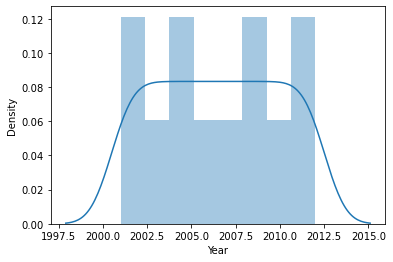

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df_years_districts['Year'])

<AxesSubplot:xlabel='Year', ylabel='Count'>

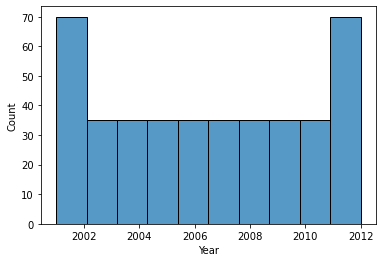

In [34]:
sns.histplot(df_years_districts['Year'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Value', ylabel='Density'>

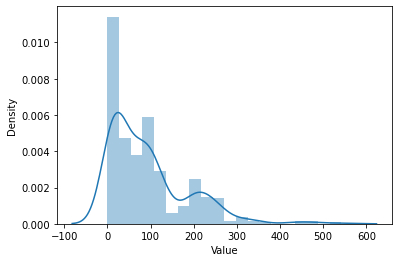

In [36]:
sns.distplot(df_years_districts['Value'])

<AxesSubplot:xlabel='Value', ylabel='Count'>

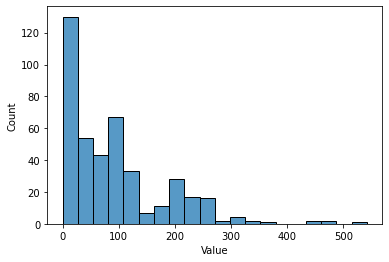

In [35]:
sns.histplot(df_years_districts['Value'])

In [42]:
df_years_districts['Districts'].unique()

array(['RANGA REDDY', 'GUNTUR', 'MAHABOOBNAGAR', 'CYBERABAD', 'LOHIT',
       'SUBANSIRI UPPER', 'PAPUM PARE', 'SIANG WEST', 'DIBRUGARH',
       'TINSUKIA', 'SONITPUR', 'KOKRAJHAR', 'PATNA', 'SARGUJA',
       'BILASPUR', 'BIZAPUR', 'RAIPUR', 'NORTH GOA', 'SOUTH GOA',
       'SURAT COMMR.', 'AHMEDABAD COMMR.', 'SONIPAT', 'FARIDABAD',
       'GURGAON', 'HISSAR', 'KANGRA', 'MANDI', 'BARAMULLA', 'POONCH',
       'DODA', 'JAMMU', 'SRINAGAR', 'SOPORE', 'RANCHI', 'GUMLA',
       'BANGALORE COMMR.', 'TRIVANDRUM', 'PALAKKAD', 'KOLLAM', 'THRISSUR',
       'TRIVANDRUM RURAL', 'JHABUA', 'INDORE', 'MUMBAI', 'MUMBAI COMMR.',
       'IMPHAL(WEST)', 'THOUBAL', 'CHURACHANDPUR', 'IMPHAL WEST',
       'IMPHAL EAST', 'KHASI HILLS EAST', 'JAINTIA HILLS', 'AIZAWL',
       'SERCHHIP', 'MAMIT', 'DIMAPUR', 'KOHIMA', 'MAYURBHANJ',
       'SUNDARGARH', 'KEONJHAR', 'LUDHIANA', 'JALANDHAR', 'CP LUDHIANA',
       'JAIPUR', 'BHARATPUR', 'ALWAR', 'EAST', 'WEST', 'SOUTH', 'CHENNAI',
       'DHARMAPURI', 'CHENGAI', 'MU

In [52]:
for i in df_years_districts['STATE/UT'].unique():
    print('For state: ',i)
    print(df_years_districts[df_years_districts['STATE/UT'] == i])
    print('\n\n')

For state:  ANDHRA PRADESH
          STATE/UT      Districts  Year  Value
0   ANDHRA PRADESH    RANGA REDDY  2001    214
1   ANDHRA PRADESH    RANGA REDDY  2002    214
2   ANDHRA PRADESH         GUNTUR  2003    210
3   ANDHRA PRADESH  MAHABOOBNAGAR  2004    183
4   ANDHRA PRADESH  MAHABOOBNAGAR  2005    212
5   ANDHRA PRADESH      CYBERABAD  2006    193
6   ANDHRA PRADESH      CYBERABAD  2007    186
7   ANDHRA PRADESH      CYBERABAD  2008    197
8   ANDHRA PRADESH      CYBERABAD  2009    186
9   ANDHRA PRADESH      CYBERABAD  2010    187
10  ANDHRA PRADESH      CYBERABAD  2011    213
11  ANDHRA PRADESH      CYBERABAD  2012    198



For state:  ARUNACHAL PRADESH
             STATE/UT        Districts  Year  Value
12  ARUNACHAL PRADESH            LOHIT  2001     16
13  ARUNACHAL PRADESH            LOHIT  2002     14
14  ARUNACHAL PRADESH            LOHIT  2003     16
15  ARUNACHAL PRADESH  SUBANSIRI UPPER  2004     10
16  ARUNACHAL PRADESH            LOHIT  2005     14
17  ARUNACHAL PRA

In [46]:
df_years_districts_outliers2 = df_years_districts[df_years_districts['Value'] > 150]

,STATE/UT,Districts,Year,Value
0,ANDHRA PRADESH,RANGA REDDY,2001,214
1,ANDHRA PRADESH,RANGA REDDY,2002,214
2,ANDHRA PRADESH,GUNTUR,2003,210
3,ANDHRA PRADESH,MAHABOOBNAGAR,2004,183
4,ANDHRA PRADESH,MAHABOOBNAGAR,2005,212
5,ANDHRA PRADESH,CYBERABAD,2006,193
6,ANDHRA PRADESH,CYBERABAD,2007,186
7,ANDHRA PRADESH,CYBERABAD,2008,197
8,ANDHRA PRADESH,CYBERABAD,2009,186
9,ANDHRA PRADESH,CYBERABAD,2010,187


In [47]:
df_years_districts_outliers2

,STATE/UT,Districts,Year,Value
0,ANDHRA PRADESH,RANGA REDDY,2001,214
1,ANDHRA PRADESH,RANGA REDDY,2002,214
2,ANDHRA PRADESH,GUNTUR,2003,210
3,ANDHRA PRADESH,MAHABOOBNAGAR,2004,183
4,ANDHRA PRADESH,MAHABOOBNAGAR,2005,212
...,...,...,...,...
331,WEST BENGAL,24 PARGANAS SOUTH,2008,239
332,WEST BENGAL,24 PARGANAS NORTH,2009,229
333,WEST BENGAL,PASCHIM MIDNAPUR,2010,268
334,WEST BENGAL,24 PARGANAS SOUTH,2011,247
